## 0. Import packages

In [1]:
import pandas as pd
import numpy as np
from PIL import Image

## 1. Read mapped information file
Source means H&E slide and target means IHC FoxP3 slide (target images are moving for registartion). We are going to draw only mapped IHC tiles so, drop unnecessary rows (null values).  
(Note) All WSIs are tiled by 512x512 px and Thumbnail tiles are 1x1 px.

In [2]:
map_df = pd.read_csv('2466516/2466516_Tumor_HE_FoxP3.csv')

In [3]:
map_df

,source_image_id,source_tile_id,source_index_x,source_index_y,source_wsi_x,source_wsi_y,source_mask_x,source_mask_y,source_filename,source_tissue_ratio,target_image_id,target_tile_id,target_index_x,target_index_y,target_wsi_x,target_wsi_y,target_mask_x,target_mask_y,target_filename,target_tissue_ratio
0,2466516_CR13-324 B1_Tumor_HE,1381,8,141,4256,72380,8,141,2466516_CR13-324 B1_Tumor_HE__x4256_y72380.png,0.093750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2466516_CR13-324 B1_Tumor_HE,1382,8,142,4256,72892,8,142,2466516_CR13-324 B1_Tumor_HE__x4256_y72892.png,0.093750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2466516_CR13-324 B1_Tumor_HE,1536,9,141,4768,72380,9,141,2466516_CR13-324 B1_Tumor_HE__x4768_y72380.png,0.718750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2466516_CR13-324 B1_Tumor_HE,1537,9,142,4768,72892,9,142,2466516_CR13-324 B1_Tumor_HE__x4768_y72892.png,0.734375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2466516_CR13-324 B1_Tumor_HE,1690,10,140,5280,71868,10,140,2466516_CR13-324 B1_Tumor_HE__x5280_y71868.png,0.343750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19451,2466516_CR13-324 B1_Tumor_HE,39028,251,123,128672,63164,251,123,2466516_CR13-324 B1_Tumor_HE__x128672_y63164.png,0.921875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19452,2466516_CR13-324 B1_Tumor_HE,39029,251,124,128672,63676,251,124,2466516_CR13-324 B1_Tumor_HE__x128672_y63676.png,0.921875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19453,2466516_CR13-324 B1_Tumor_HE,39030,251,125,128672,64188,251,125,2466516_CR13-324 B1_Tumor_HE__x128672_y64188.png,0.593750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19454,2466516_CR13-324 B1_Tumor_HE,39183,252,123,129184,63164,252,123,2466516_CR13-324 B1_Tumor_HE__x129184_y63164.png,0.218750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# drop rows with null values
non_null_map_df = map_df.dropna()
non_null_map_df.reset_index(inplace=True, drop=True)

In [5]:
non_null_map_df

,source_image_id,source_tile_id,source_index_x,source_index_y,source_wsi_x,source_wsi_y,source_mask_x,source_mask_y,source_filename,source_tissue_ratio,target_image_id,target_tile_id,target_index_x,target_index_y,target_wsi_x,target_wsi_y,target_mask_x,target_mask_y,target_filename,target_tissue_ratio
0,2466516_CR13-324 B1_Tumor_HE,2356,15,31,7840,16060,15,31,2466516_CR13-324 B1_Tumor_HE__x7840_y16060.png,1.000000,2466516_CR13-324 B1_Tumor_FoxP3,2087.0,13.0,33.0,6873.0,16914.0,13.0,33.0,2466516_CR13-324 B1_Tumor_FoxP3__x6873_y16914.png,0.078125
1,2466516_CR13-324 B1_Tumor_HE,2357,15,32,7840,16572,15,32,2466516_CR13-324 B1_Tumor_HE__x7840_y16572.png,1.000000,2466516_CR13-324 B1_Tumor_FoxP3,2088.0,13.0,34.0,6873.0,17426.0,13.0,34.0,2466516_CR13-324 B1_Tumor_FoxP3__x6873_y17426.png,0.375000
2,2466516_CR13-324 B1_Tumor_HE,2358,15,33,7840,17084,15,33,2466516_CR13-324 B1_Tumor_HE__x7840_y17084.png,0.812500,2466516_CR13-324 B1_Tumor_FoxP3,2089.0,13.0,35.0,6873.0,17938.0,13.0,35.0,2466516_CR13-324 B1_Tumor_FoxP3__x6873_y17938.png,0.453125
3,2466516_CR13-324 B1_Tumor_HE,2510,16,30,8352,15548,16,30,2466516_CR13-324 B1_Tumor_HE__x8352_y15548.png,1.000000,2466516_CR13-324 B1_Tumor_FoxP3,2244.0,14.0,32.0,7385.0,16402.0,14.0,32.0,2466516_CR13-324 B1_Tumor_FoxP3__x7385_y16402.png,0.250000
4,2466516_CR13-324 B1_Tumor_HE,2511,16,31,8352,16060,16,31,2466516_CR13-324 B1_Tumor_HE__x8352_y16060.png,1.000000,2466516_CR13-324 B1_Tumor_FoxP3,2245.0,14.0,33.0,7385.0,16914.0,14.0,33.0,2466516_CR13-324 B1_Tumor_FoxP3__x7385_y16914.png,0.953125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16991,2466516_CR13-324 B1_Tumor_HE,38719,249,124,127648,63676,249,124,2466516_CR13-324 B1_Tumor_HE__x127648_y63676.png,1.000000,2466516_CR13-324 B1_Tumor_FoxP3,39147.0,247.0,121.0,126681.0,61970.0,247.0,121.0,2466516_CR13-324 B1_Tumor_FoxP3__x126681_y6197...,0.843750
16992,2466516_CR13-324 B1_Tumor_HE,38720,249,125,127648,64188,249,125,2466516_CR13-324 B1_Tumor_HE__x127648_y64188.png,1.000000,2466516_CR13-324 B1_Tumor_FoxP3,39148.0,247.0,122.0,126681.0,62482.0,247.0,122.0,2466516_CR13-324 B1_Tumor_FoxP3__x126681_y6248...,0.062500
16993,2466516_CR13-324 B1_Tumor_HE,38873,250,123,128160,63164,250,123,2466516_CR13-324 B1_Tumor_HE__x128160_y63164.png,0.890625,2466516_CR13-324 B1_Tumor_FoxP3,39304.0,248.0,120.0,127193.0,61458.0,248.0,120.0,2466516_CR13-324 B1_Tumor_FoxP3__x127193_y6145...,0.328125
16994,2466516_CR13-324 B1_Tumor_HE,38874,250,124,128160,63676,250,124,2466516_CR13-324 B1_Tumor_HE__x128160_y63676.png,1.000000,2466516_CR13-324 B1_Tumor_FoxP3,39305.0,248.0,121.0,127193.0,61970.0,248.0,121.0,2466516_CR13-324 B1_Tumor_FoxP3__x127193_y6197...,0.421875


## 2. Check original H&E and IHC thumbnail images and draw H&E width & height for canvas

In [6]:
# check original IHC thumbnail image
ihc_thumbnail_og = Image.open('2466516/2466516_CR13-324 B1_Tumor_FoxP3___thumbnail_tilesize_x-1-y-1.png').convert('RGB')
ihc_thumbnail = np.array(ihc_thumbnail_og)
print('IHC Width:', ihc_thumbnail_og.width)
print('IHC Height:', ihc_thumbnail_og.height)

IHC Width: 265
IHC Height: 158


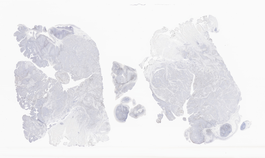

In [7]:
ihc_thumbnail_og

In [8]:
he_thumbnail_og = Image.open('2466516/2466516_CR13-324 B1_Tumor_HE___thumbnail_tilesize_x-1-y-1.png').convert('RGB')
print('H&E Width:', he_thumbnail_og.width)
print('H&E Height:', he_thumbnail_og.height)

H&E Width: 266
H&E Height: 155


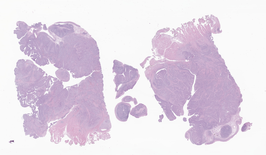

In [9]:
he_thumbnail_og

In [10]:
# draw blank canvas (same size of H&E thumbnail)
canvas = Image.new('RGB', (he_thumbnail_og.width, he_thumbnail_og.height))
canvas_array = np.array(canvas)

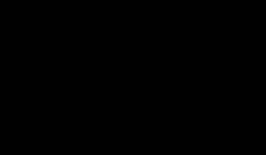

In [11]:
canvas

## 3. Draw mapped tiles on new canvas

In [12]:
def draw_mapped_thumbnail(canvas_array, non_null_map_df, ihc_thumbnail, thumnail_tile_size):
       
    for i in range(len(non_null_map_df)):
        
        target_mask_x = int(non_null_map_df.loc[i, 'target_mask_x'])
        target_mask_y = int(non_null_map_df.loc[i, 'target_mask_y'])

        source_mask_x = int(non_null_map_df.loc[i, 'source_mask_x'])
        source_mask_y = int(non_null_map_df.loc[i, 'source_mask_y'])
        
        tile = ihc_thumbnail[target_mask_y : target_mask_y + thumnail_tile_size, target_mask_x : target_mask_x + thumnail_tile_size]
        canvas_array[source_mask_y : source_mask_y + thumnail_tile_size, source_mask_x : source_mask_x + thumnail_tile_size] = tile
    
    return canvas_array

In [13]:
thumnail_tile_size = 1
mapped_ihc = draw_mapped_thumbnail(canvas_array, non_null_map_df, ihc_thumbnail, thumnail_tile_size)

In [14]:
mapped_ihc = Image.fromarray(mapped_ihc)

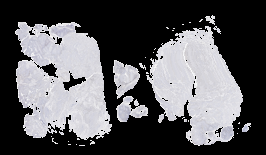

In [15]:
mapped_ihc